In [10]:
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New

# log to stdout
import logging
import sys
import os
import numpy as np
import logging
from colorama import Fore # support colored output in terminal
from colorama import Style
if __name__ == '__main__':
    logger = logging.getLogger()
    logger.handlers = [logging.StreamHandler(sys.stdout)]
else:
    logger = logging.getLogger(__name__)
logger.level = logging.INFO
# set spacing of the indentation
ut.indentation_sep = '  '
from pathlib import Path
import importlib.util
def module_from_file(module_name, file_path): #The code that imports the file which originated the training with all the instructions
            spec = importlib.util.spec_from_file_location(module_name, file_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            return module
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt

In [15]:
import importlib as imp
imp.reload(cplt)

<module 'general_purpose.cartopy_plots' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/general_purpose/cartopy_plots.py'>

The goal of this notebook is to compute the composite maps for the 10 most extreme events in the 7200 dataset.
## Extract 100 years

## 

In [11]:

#folder = Path('../VAE/xforanalogs/NA24by48/global_logit/yrs100/interT15') #France
#folder_long = Path('../VAE/xforanalogs/NA24by48/global_logit/yrs8000/interT15')
folder = Path('../VAE/xforanalogs/ZGonlyNA24by48/Scandinavia/global_logit/yrs100/interT15')
folder_long = Path('../VAE/xforanalogs/ZGonlyNA24by48/Scandinavia/global_logit/yrs8000/interT15') #Scandinavia


fold = 0
foo = module_from_file("foo", f'{folder}/Funs.py')
ef = foo.ef # Inherit ERA_Fields_New from the file we are calling
ut = foo.ut

run_vae_kwargs = ut.json2dict(f"{folder}/config.json")
T = ut.extract_nested(run_vae_kwargs, 'T')
if (ut.keys_exists(run_vae_kwargs, 'label_period_start') and ut.keys_exists(run_vae_kwargs, 'label_period_end')):
    label_period_start = ut.extract_nested(run_vae_kwargs, 'label_period_start')
    label_period_end = ut.extract_nested(run_vae_kwargs, 'label_period_end')
    time_start = ut.extract_nested(run_vae_kwargs, 'time_start')
    time_end = ut.extract_nested(run_vae_kwargs, 'time_end')
    #if label_period_start is not None:
    #    time_start = label_period_start
    #if label_period_end is not None: We comment this because the idea is to keep extra X's so that we get also the X's for the period that is normally deprecated since those heat waves end in september
    #    time_end = label_period_end
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'myinput' : 'N', 'evaluate_epoch' :1, 'time_start' : time_start}) #, 'time_end' : time_end}) # it doesn't matter which checkpoint we choose since we do not need the output of the VAE
else:
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'myinput' : 'N', 'evaluate_epoch' :1}) # backward compatibiity where there was no month of may
if not os.path.exists(ut.extract_nested(run_vae_kwargs, 'mylocal')): # we are assuming that training was not run on R740server5
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'mylocal' : '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/'})
n_days = time_end-time_start-T+1  
run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'range_nfolds' : [fold],'normalization_mode' : 'None'})
extra_day = 1
if ut.keys_exists(run_vae_kwargs, 'A_weights'):
    A_weights = ut.extract_nested(run_vae_kwargs, 'A_weights')
    if A_weights is not None:
        extra_day = A_weights[0] # We need to see if the labels were interpolated to see how much the algorithm should jump each summer
area = ut.extract_nested(run_vae_kwargs, 'area')

logger.info(f"{run_vae_kwargs = }")
logger.info(f"{Fore.BLUE}") #  indicates we are inside the routine  
history, N_EPOCHS, INITIAL_EPOCH, checkpoint_path, LAT, LON, vae, X_va, Y_va, X_tr, Y_tr, _ = foo.run_vae(folder, **run_vae_kwargs)
logger.info(f"{Style.RESET_ALL}")
X_tr = X_tr.reshape(-1,n_days,*X_tr.shape[1:])[:,(label_period_start-time_start):,...]
X_tr.shape

==Checking GPU==
==Checking CUDA==
run_vae_kwargs = {'myinput': 'N', 'XY_run_vae_keywargs': None, 'log_level': 20, 'k_fold_cross_val_kwargs': {'keep_dims': None, 'nfolds': 10, 'val_folds': 1, 'range_nfolds': [0], 'u': 1, 'normalization_mode': 'None', 'classification': True, 'evaluate_epoch': 1, 'repeat_nan': 5, 'use_autoencoder': False, 'create_or_load_vae_kwargs': {'checkpoint_every': 1, 'VAE_kwargs': {'k1': 0.9, 'k2': 0.1, 'from_logits': False, 'field_weights': [2.0, 1.0, 2.0], 'lat_0': None, 'lat_1': None, 'lon_0': None, 'lon_1': None, 'coef_out': 1, 'coef_in': 0, 'coef_class': 0, 'loss_type': None, 'class_type': 'stochastic', 'mask_area': 'Scandinavia', 'Z_DIM': 8, 'N_EPOCHS': 10, 'print_summary': True}, 'build_encoder_skip_kwargs': {'encoder_conv_filters': [32, 64, 64, 64], 'encoder_conv_kernel_size': [3, 3, 3, 3], 'encoder_conv_strides': [2, 2, 2, 1], 'encoder_conv_padding': ['same', 'same', 'same', 'valid'], 'encoder_conv_activation': ['LeakyRelu', 'LeakyRelu', 'LeakyRelu', 'Lea

2023-01-17 17:12:44.651001: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


    prepare_data_and_mask:
        load_data:
            Opening field tas
            First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_tas_inter.nc
            monotonize_years:
            monotonize_years: completed in 4.0 s
            First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc
            First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_gparea.nc
            select_years:
            select_years: completed in 0.7 s
            select_lonlat:
            select_lonlat: completed in 0.5 s
            First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc
            First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc
            Opening field zg
            First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_zg500_inter.nc
            monotonize_years:
            monotonize_years: completed in 3.7 s
   

(90, 90, 24, 48, 3)

### Compute the extreme events (100 yrs)

In [12]:
time_series_tr = np.load(f'{folder}/fold_{fold}/time_series_tr.npy')[:,0] #0th component contains temperature
time_series_tr_reshape = time_series_tr.reshape(-1,n_days)[:,(label_period_start-time_start):]
print(f'{time_series_tr_reshape.shape = }')
convseq = np.zeros(T) # convolution to be used for running mean
convseq[range(0,T,1)] = 1/T
convseq = convseq[::-1]
print(f'{convseq = }')
from functools import partial # allows us to create a function with arguments passed
convolve_vec = np.vectorize(partial(np.convolve, **{'mode':'valid'}), signature='(n),(m)->(k)')
A_tr = convolve_vec(time_series_tr_reshape,  convseq)
A_max_i = np.max(A_tr,1)
Ti_i = np.argmax(A_tr,1)
year_a_i = range(len(A_max_i))
#print(f"{A_max_i.shape = },{Ti_i.shape = }, {len(year_a_i) = },{Ti_i.min() = }, {Ti_i.max() = }")
A_max_sorted_i = ln.ef.a_decrese(A_max_i, Ti_i, year_a_i)
extreme_X = [X_tr[value[1][1],value[1][0],...,1:2] for value in A_max_sorted_i[:10]]
print(f'{A_max_sorted_i[:10] = }')

time_series_tr_reshape.shape = (90, 90)
convseq = array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])
A_max_sorted_i[:10] = [(3.5140586058298746, [27, 60]), (3.44085259437561, [35, 70]), (3.139282560348511, [75, 30]), (3.1309822003046675, [75, 11]), (2.9542627334594727, [68, 41]), (2.7803743362426756, [36, 61]), (2.776433237393697, [9, 80]), (2.7339284857114157, [5, 51]), (2.7184422175089518, [8, 50]), (2.599123704433441, [50, 20])]


We mostly care about the largest threshold here, as the map will be repeated in the `trajectory_analogue.ipynb`

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fe582c27250>


/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/general_purpose/cartopy_plots.py:138: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, label=colorbar_label, extend='both')


<GeoAxesSubplot:>

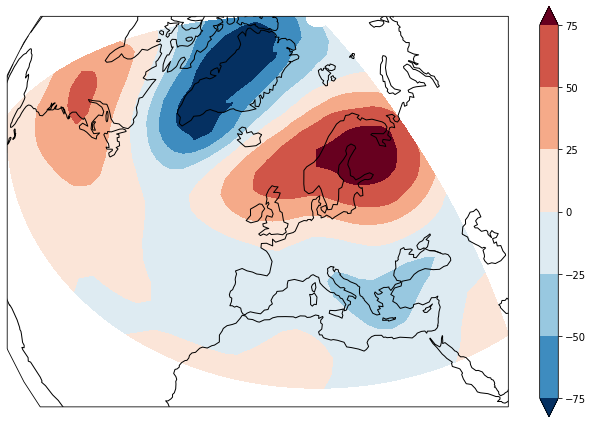

In [16]:
cplt.multiple_field_plot2(LON, LAT, np.mean(extreme_X,0),projections=[ccrs.Orthographic(10, 55)],
                         fig_num=8, put_colorbar=True,
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='contourf',draw_labels=False,draw_gridlines=False,
                        )

## Extract 8000 years

This dataset will function as a control (in particular its training set, fold 0, which has 7200 years)

In [13]:


fold = 9
foo = module_from_file("foo", f'{folder_long}/Funs.py')
ef = foo.ef # Inherit ERA_Fields_New from the file we are calling
ut = foo.ut

run_vae_kwargs = ut.json2dict(f"{folder_long}/config.json")
T = ut.extract_nested(run_vae_kwargs, 'T')
if (ut.keys_exists(run_vae_kwargs, 'label_period_start') and ut.keys_exists(run_vae_kwargs, 'label_period_end')):
    label_period_start = ut.extract_nested(run_vae_kwargs, 'label_period_start')
    label_period_end = ut.extract_nested(run_vae_kwargs, 'label_period_end')
    time_start = ut.extract_nested(run_vae_kwargs, 'time_start')
    time_end = ut.extract_nested(run_vae_kwargs, 'time_end')
    #if label_period_start is not None:
    #    time_start = label_period_start
    #if label_period_end is not None: We comment this because the idea is to keep extra X's so that we get also the X's for the period that is normally deprecated since those heat waves end in september
    #    time_end = label_period_end
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'myinput' : 'N', 'evaluate_epoch' :1, 'time_start' : time_start}) #, 'time_end' : time_end}) # it doesn't matter which checkpoint we choose since we do not need the output of the VAE
else:
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'myinput' : 'N', 'evaluate_epoch' :1}) # backward compatibiity where there was no month of may
if not os.path.exists(ut.extract_nested(run_vae_kwargs, 'mylocal')): # we are assuming that training was not run on R740server5
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'mylocal' : '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/'})
n_days = time_end-time_start-T+1  
run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'range_nfolds' : [fold],'normalization_mode' : 'None', 'use_autoencoder' : False, 'lon_start' : -64, 'lon_end' : 64})
extra_day = 1
if ut.keys_exists(run_vae_kwargs, 'A_weights'):
    A_weights = ut.extract_nested(run_vae_kwargs, 'A_weights')
    if A_weights is not None:
        extra_day = A_weights[0] # We need to see if the labels were interpolated to see how much the algorithm should jump each summer

logger.info(f"{run_vae_kwargs = }")
logger.info(f"{Fore.BLUE}") #  indicates we are inside the routine  
history, N_EPOCHS, INITIAL_EPOCH, checkpoint_path, LAT, LON, vae, X_va, Y_va, X_tr, Y_tr, _ = foo.run_vae(folder_long, **run_vae_kwargs)
logger.info(f"{Style.RESET_ALL}")
X_tr = X_tr.reshape(-1,n_days,*X_tr.shape[1:])[:,(label_period_start-time_start):,...]
X_tr.shape
time_series_tr = np.load(f'{folder_long}/fold_{fold}/time_series_tr.npy')[:,0] #0th component contains temperature
time_series_tr_reshape = time_series_tr.reshape(-1,n_days)[:,(label_period_start-time_start):]
print(f'{time_series_tr_reshape.shape = }')



==Checking GPU==
==Checking CUDA==
run_vae_kwargs = {'myinput': 'N', 'XY_run_vae_keywargs': None, 'log_level': 20, 'k_fold_cross_val_kwargs': {'keep_dims': None, 'nfolds': 10, 'val_folds': 1, 'range_nfolds': [9], 'u': 1, 'normalization_mode': 'None', 'classification': True, 'evaluate_epoch': 1, 'repeat_nan': 5, 'use_autoencoder': False, 'create_or_load_vae_kwargs': {'checkpoint_every': 1, 'VAE_kwargs': {'k1': 0.9, 'k2': 0.1, 'from_logits': False, 'field_weights': [20.0, 1.0, 20.0], 'lat_0': None, 'lat_1': None, 'lon_0': None, 'lon_1': None, 'coef_out': 1, 'coef_in': 0, 'coef_class': 0, 'loss_type': None, 'class_type': 'stochastic', 'mask_area': 'Scandinavia', 'Z_DIM': 8, 'N_EPOCHS': 2, 'print_summary': True}, 'build_encoder_skip_kwargs': {'encoder_conv_filters': [32, 64, 64, 64], 'encoder_conv_kernel_size': [3, 3, 3, 3], 'encoder_conv_strides': [2, 2, 2, 1], 'encoder_conv_padding': ['same', 'same', 'same', 'valid'], 'encoder_conv_activation': ['LeakyRelu', 'LeakyRelu', 'LeakyRelu', 'Le

2022-12-13 11:49:21.379441: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


    prepare_data_and_mask:
        load_data:
            Opening field tas
            monotonize_years:
            monotonize_years: completed in 3.9 s
            select_years:
            select_years: completed in 0.9 s
            select_lonlat:
            select_lonlat: completed in 1 min 13.1 s
            Opening field zg
            monotonize_years:
            monotonize_years: completed in 3.6 s
            select_years:
            select_years: completed in 0.9 s
            select_lonlat:
            select_lonlat: completed in 1 min 13.4 s
            Opening field mrso
            monotonize_years:
            monotonize_years: completed in 3.8 s
            select_years:
            select_years: completed in 0.9 s
            select_lonlat:
            select_lonlat: completed in 1 min 8.7 s
        load_data: completed in 4 min 48.4 s
        prepare_XY:
            return_threshold = True            
            make_XY:
                make_X:
                m

### Compute extremes

The idea is to select the threshold that was obtained in 100 year long dataset and use it as a lowest bound for the events we will look in the control run

In [16]:
convseq = np.zeros(T) # convolution to be used for running mean
convseq[range(0,T,extra_day)] = 1/(T//extra_day)
convseq = convseq[::-1]
print(f'{convseq = }')
from functools import partial # allows us to create a function with arguments passed
convolve_vec = np.vectorize(partial(np.convolve, **{'mode':'valid'}), signature='(n),(m)->(k)')
A_tr = convolve_vec(time_series_tr_reshape,  convseq)
A_max_i = np.max(A_tr,1)
Ti_i = np.argmax(A_tr,1)
year_a_i = range(len(A_max_i))
#print(f"{A_max_i.shape = },{Ti_i.shape = }, {len(year_a_i) = },{Ti_i.min() = }, {Ti_i.max() = }")
A_max_sorted_i = ln.ef.a_decrese(A_max_i, Ti_i, year_a_i)
a,b,c,d = ln.ef.return_time_fix(A_max_sorted_i, modified='yes')
np.where(np.array(b)<3.5140586058298746)[0][0]

convseq = array([0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. ,
       0. , 0.2])


116

## Plot the composite maps

len(extreme_X) = 65, extreme_X[0].shape = (24, 128, 1), A_max_sorted_i[i_retained] = (3.767221212387085, [24, 26])
norm = <matplotlib.colors.TwoSlopeNorm object at 0x7f58394f4d30>


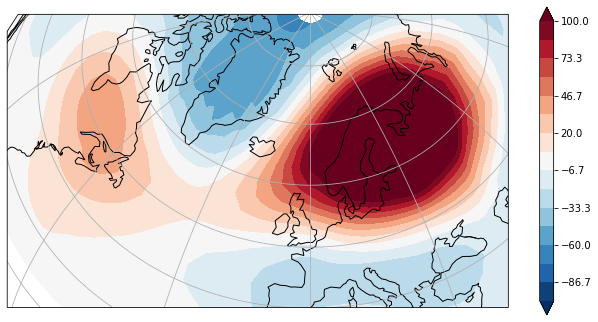

In [17]:
i_retained = 65
extreme_X = [X_tr[value[1][1],value[1][0],...,1:2] for value in A_max_sorted_i[:i_retained]]

print(f'{len(extreme_X) = }, {extreme_X[0].shape = }, {A_max_sorted_i[i_retained] = }')
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, np.mean(extreme_X,0),projections=[ccrs.Orthographic(0, 55)],
                         fig_num=8, put_colorbar=True, levs=np.linspace(-100,100,16), use_norm=False,
                         extents=(-100, 40, 30, 60), shrink=0.75, figure=fig,
                         mode='contourf',draw_labels=False,draw_gridlines=True
                        )
fig.savefig(f'Images/teleconnection_{area}7200.png',bbox_inches="tight", dpi=200)

In [9]:
area

'Scandinavia'

len(extreme_X) = 10, extreme_X[0].shape = (24, 48, 1), A_max_sorted_i[i_retained] = (6.591193580627442, [26, 3218])
norm = <matplotlib.colors.TwoSlopeNorm object at 0x7f87acddec10>


<GeoAxesSubplot:>

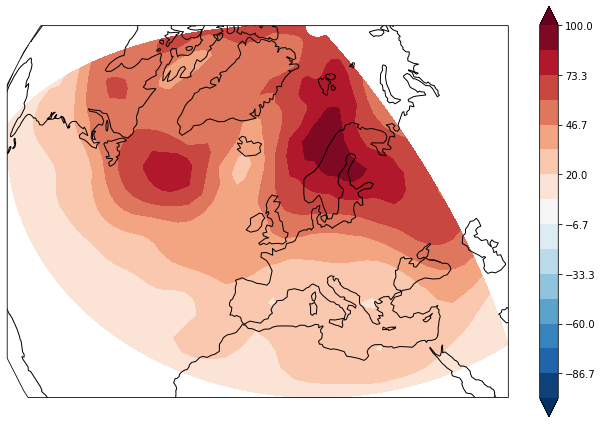

In [10]:
i_retained = 10
extreme_X = [X_tr[value[1][1],value[1][0],...,1:2] for value in A_max_sorted_i[:i_retained]]
print(f'{len(extreme_X) = }, {extreme_X[0].shape = }, {A_max_sorted_i[i_retained] = }')
cplt.multiple_field_plot2(LON, LAT, np.std(extreme_X,0),projections=[ccrs.Orthographic(10, 55)],
                         fig_num=8, put_colorbar=True, levs=np.linspace(-100,100,16),use_norm=False,
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='contourf',draw_labels=False,draw_gridlines=False,
                        )

len(extreme_X) = 60, extreme_X[0].shape = (24, 48, 1), A_max_sorted_i[i_retained] = (6.591193580627442, [26, 3218])
norm = <matplotlib.colors.TwoSlopeNorm object at 0x7f88fc13cdc0>


<GeoAxesSubplot:>

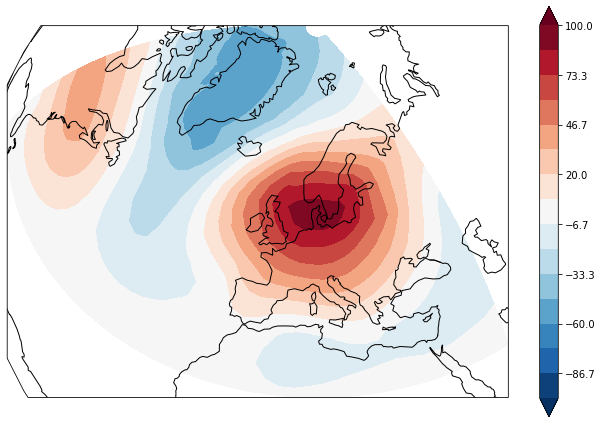

In [11]:
i_retained = 10
extreme_X = [X_tr[value[1][1],value[1][0]+next_day,...,1:2] for next_day in range(-9,9,3) for value in A_max_sorted_i[:i_retained]]
print(f'{len(extreme_X) = }, {extreme_X[0].shape = }, {A_max_sorted_i[i_retained] = }')
cplt.multiple_field_plot2(LON, LAT, np.mean(extreme_X,0),projections=[ccrs.Orthographic(10, 55)],
                         fig_num=8, put_colorbar=True, levs=np.linspace(-100,100,16),use_norm=False,
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='contourf',draw_labels=False,draw_gridlines=False,
                        )